In [1]:
import numpy as np
import torch
import matplotlib.pylab as pl
import pylab
import math
import ot
from pathlib import Path

#import proplot as plot
#plot.rc['figure.facecolor'] = "white"

In [2]:
if torch.cuda.is_available():
    device='cuda'
    dtype = torch.cuda.DoubleTensor
else:
    device='cpu'
    dtype=torch.DoubleTensor
print(device)

device='cpu'
dtype=torch.DoubleTensor
torch.set_default_tensor_type(dtype)

cuda


In [3]:
import os
import sys
sys.path.append('../code/')

In [4]:
from SWGG import SWGG_CP
from utils import sort_to_plan
from utils_Color_Transfer import transform,random_subsample,minibatch_kmeans_subsample
from generate_data import make_data

In [5]:
gray_theta = torch.tensor([150/256, 150/256, 150/256])

/home/gui/Documents/Thèse/Github/SWGG/Notebook/data/Images/Colorization-Color Transfer


Text(0.5, 1.0, 'Image 2')

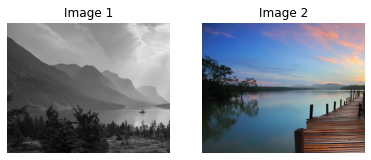

In [7]:
# Loading images
this_file = os.path.realpath('__file__')
data_path = os.path.join(Path(this_file).parent.parent, 'Notebook/data/Images/Colorization-Color Transfer')
#data_path = os.path.join(Path(this_file).parent)
print(data_path)
I1 = pl.imread(os.path.join(data_path, 'mountain.png')).astype(np.float64)
I2 = pl.imread(os.path.join(data_path, 'bridge.png')).astype(np.float64)

X = torch.tensor(I1.reshape((I1.shape[0] * I1.shape[1], I1.shape[2])))
X_line=torch.matmul(X,gray_theta)
X=X_line[:,None]@gray_theta[None,:]
I1=torch.clip(X.reshape(I1.shape),0,1)
Y = torch.tensor(I2.reshape((I2.shape[0] * I2.shape[1], I2.shape[2])))

pl.figure(1, figsize=(6.4, 3))
pl.subplot(1, 2, 1)
pl.imshow(I1)
pl.axis('off')
pl.title('Image 1')

pl.subplot(1, 2, 2)
pl.imshow(I2)
pl.axis('off')
pl.title('Image 2')

In [8]:
X2,Y2=random_subsample(X,Y,nb=2000)

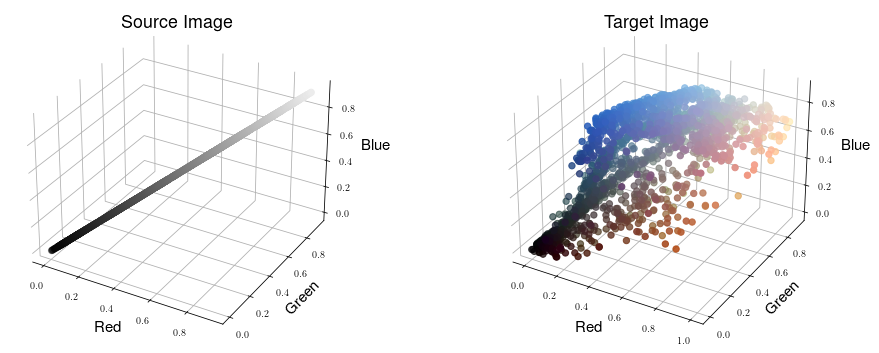

In [9]:
minor_ticks = np.arange(0,125,125)/100

pl.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

size = 40
fig = pl.figure(figsize=(15,5))
ax = fig.add_subplot(121, projection='3d')

ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')

ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(minor_ticks, minor=True)
ax.set_zticks(minor_ticks, minor=True)

pl.scatter(X2[:,0],X2[:,1],zs=X2[:,2],s=size,c=X2)
ax.set_xlabel('Red',size=15)
ax.set_ylabel('Green',size=15)
ax.set_zlabel('Blue',size=15,y=5)
ax.zaxis.labelpad=10
ax.set_title('Source Image', y=1.0, pad=6,size=18)

ax = fig.add_subplot(122, projection='3d')
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')

#major_ticks = np.arange(0,125,25)/100
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(minor_ticks, minor=True)
ax.set_zticks(minor_ticks, minor=True)

pl.scatter(Y2[:,0],Y2[:,1],zs=Y2[:,2],s=size,c=Y2)
ax.set_xlabel('Red',size=15)
ax.set_ylabel('Green',size=15)
ax.set_zlabel('Blue',size=15)
ax.zaxis.labelpad=10

ax.set_title('Target Image', y=1.0, pad=6,size=18)
pl.tight_layout()
pl.savefig("Cloud_point_colorization.pdf",bbox_inches='tight')
pl.show()

In [10]:
_,u,v=SWGG_CP(X,Y,gray_theta.reshape(3,1))
X_color=X.clone()
X_color[u]=Y[v]
I1_colorized=X_color.reshape(I1.shape)

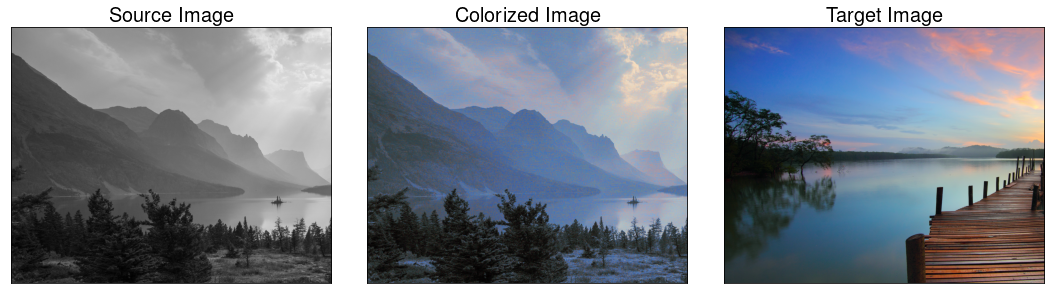

In [11]:
f, ax = pl.subplots(1, 3, figsize=(15, 4))
pl.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})
ax[0].imshow(I1)
ax[1].imshow(I1_colorized)
ax[2].imshow(I2)

ax[0].set_title('Source Image', fontsize = 20)
ax[1].set_title('Colorized Image', fontsize = 20)
ax[2].set_title('Target Image', fontsize=20)

for axis in ax:
    axis.get_yaxis().set_visible(False)
    axis.get_xaxis().set_visible(False)

f.patch.set_alpha(0)
pl.tight_layout()
pl.savefig("colorization.png",bbox_inches='tight')
pl.show()